# License Plate Detection

## Install Libraries

In [24]:
!pip install easyocr
!pip install imutils

## Load Image

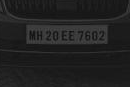

In [25]:
import cv2
import numpy as np
import imutils
import easyocr
from google.colab.patches import cv2_imshow

img = cv2.imread("car.jpg", cv2.IMREAD_GRAYSCALE)
img = img[100:200,70:200]

cv2_imshow(img)

## Detect Edges

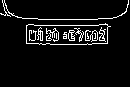

In [26]:
edged = cv2.Canny(img, 0, 200)
cv2_imshow(edged)

## Extracting and Displaying the Largest Quadrilateral Contour in the image

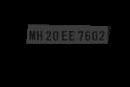

In [27]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

mask = np.zeros(img.shape, np.uint8)
plate = cv2.drawContours(mask, [location], 0, 255, -1)
plate = cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(plate)

## Cropping and Extracting Text from the Detected License Plate

In [28]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = img[x1:x2+1, y1:y2+1]
cv2_imshow(cropped_image)

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)
print(f'Plate is: {result[0][1]}')

[([[1, 5], [81, 5], [81, 20], [1, 20]], 'MH 20EE 7602', 0.48680776152259364)]
Plate is: MH 20EE 7602
